<a href="https://colab.research.google.com/github/tirzors07/tirzors07/blob/main/KDD_INIT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas

In [2]:
!pip install numpy

In [3]:
!pip install seaborn
!pip install matplotlib
!pip install plotly
!pip install tabulate

|    |   sepal_length |   sepal_width |   petal_length |   petal_width | species   |
|---:|---------------:|--------------:|---------------:|--------------:|:----------|
|  0 |            5.1 |           3.5 |            1.4 |           0.2 | setosa    |
|  1 |            4.9 |           3   |            1.4 |           0.2 | setosa    |
|  2 |            4.7 |           3.2 |            1.3 |           0.2 | setosa    |
|  3 |            4.6 |           3.1 |            1.5 |           0.2 | setosa    |
|  4 |            5   |           3.6 |            1.4 |           0.2 | setosa    |
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 


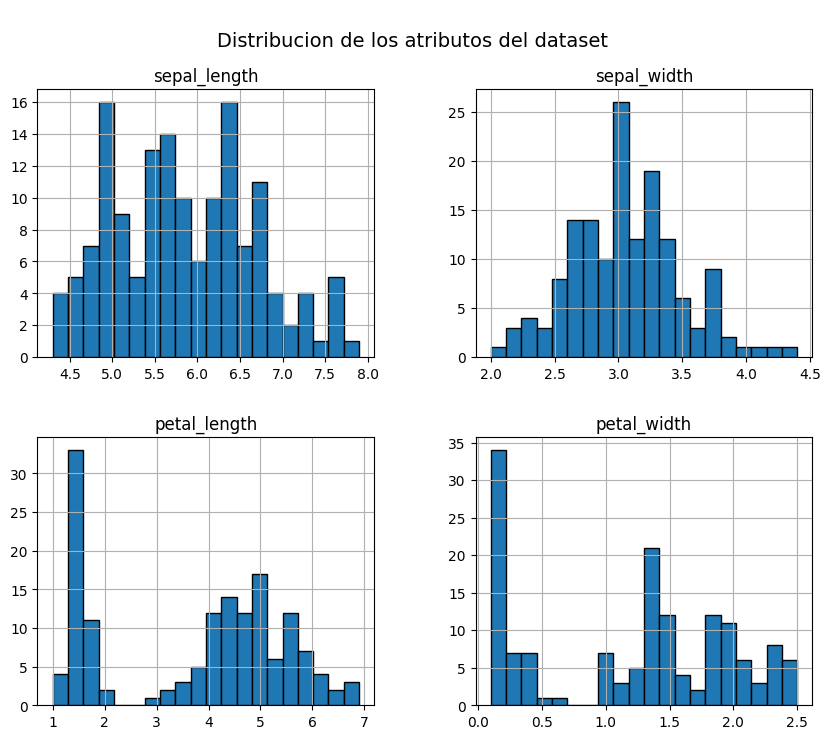

Asimetria
 sepal_length    0.314911
sepal_width     0.334053
petal_length   -0.274464
petal_width    -0.104997
dtype: float64
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.054000      3.758667     1.198667
std        0.828066     0.433594      1.764420     0.763161
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000
Media
|              |       0 |
|:-------------|--------:|
| sepal_length | 5.84333 |
| sepal_width  | 3.054   |
| petal_length | 3.75867 |
| petal_width  | 1.19867 |
Mediana
|              |    0 |
|:-------------|-----:|
| sepal_length | 5.8  |
| sepal_width  | 3    |
| petal_length | 4.35 |
| petal_width  | 1.3  |
Moda
|        

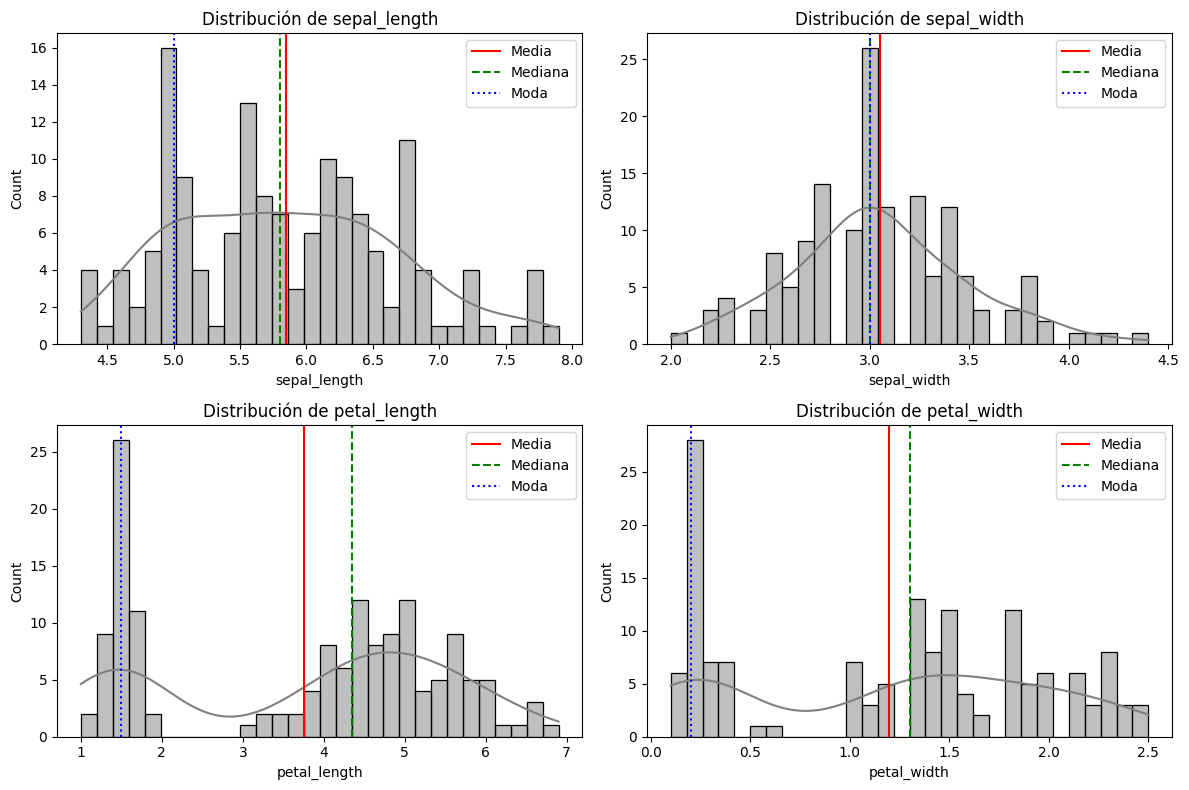

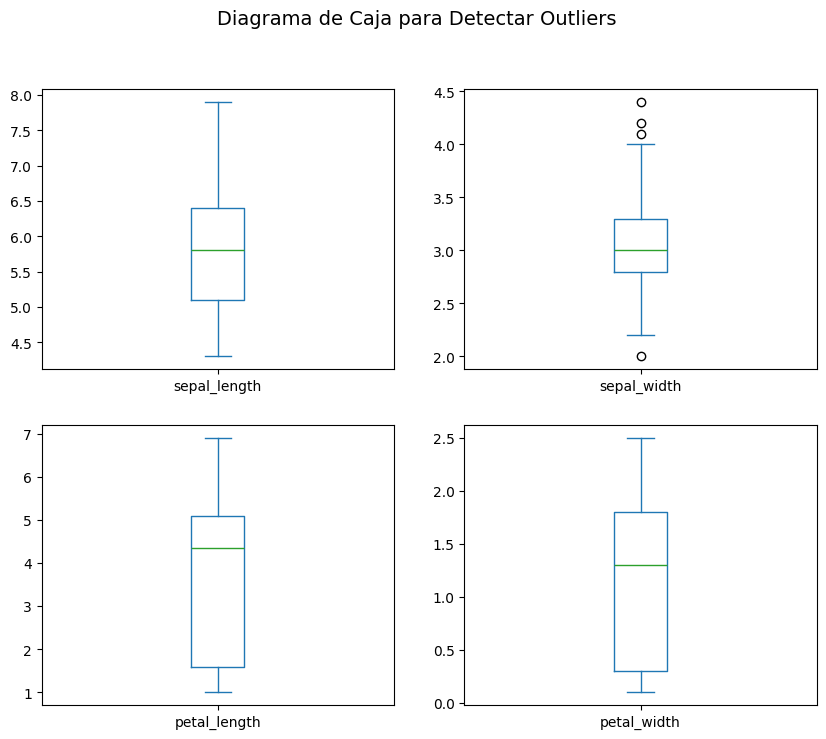

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.109369      0.871754     0.817954
sepal_width      -0.109369     1.000000     -0.420516    -0.356544
petal_length      0.871754    -0.420516      1.000000     0.962757
petal_width       0.817954    -0.356544      0.962757     1.000000


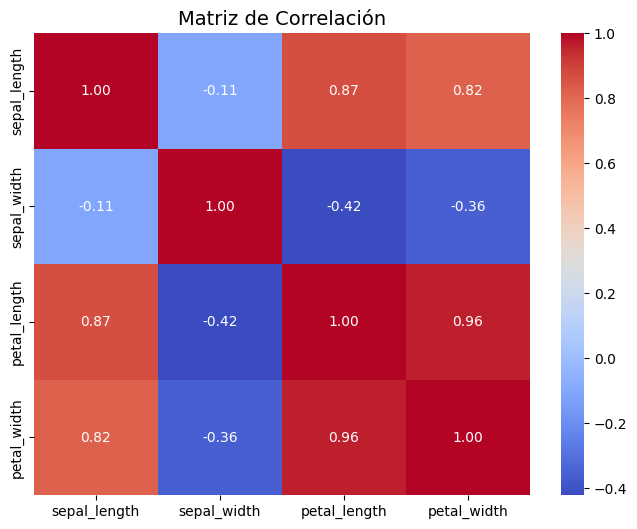

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tabulate import tabulate
#load data set
df = pd.read_csv("iris.csv")

print(df.head().to_markdown())
print(df.info())
print("Faltan Datos?\n", tabulate(df.isnull().sum().items(), headers=["Columna","Valores Nulos"], tablefmt="pipe"))

df.hist(figsize=(10,8),bins=20,edgecolor = 'black')
plot.suptitle("\nDistribucion de los atributos del dataset",fontsize = 14)
plot.show()
print("Asimetria\n",df.select_dtypes(include=['number']).skew())  # Valores positivos indican sesgo a la derecha, negativos a la izquierda.


#medidas estadisticas
print(df.describe())
print("Media")
print(df.select_dtypes(include=['number']).mean().to_markdown())
print("Mediana")
print(df.select_dtypes(include=['number']).median().to_markdown())
print("Moda")
print(df.select_dtypes(include=['number']).mode().iloc[0].to_markdown())
# Configurar sub-graficos
# Seleccionar solo columnas numéricas
num_cols = df.select_dtypes(include=['number']).columns
num_vars = len(num_cols)

# Definir numero de filas y columnas
ncols = 2 #dos columnas para mejor visualizacion
nrows = int(np.ceil(num_vars / ncols))  #calcular num de filas necesarias

# Crear la figura y los sub.-graficos
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(12, nrows * 4))
axes = axes.flatten()  # Convertir en una lista para iterar fácilmente

#grafica cada var numerica
for i, col in enumerate(num_cols):
    data = df[col].dropna()  #eliminar NaN para evitar problemas
    mean = data.mean()
    median = data.median()
    mode = data.mode().iloc[0] if not data.mode().empty else mean  # Primera moda o media si no hay moda

    #histograma
    sns.histplot(data, bins=30, kde=True, color="gray", ax=axes[i])

    #lineas para Media, Mediana y Moda
    axes[i].axvline(mean, color='r', linestyle='-', label='Media')
    axes[i].axvline(median, color='g', linestyle='--', label='Mediana')
    axes[i].axvline(mode, color='b', linestyle=':', label='Moda')

    #labels
    axes[i].set_title(f"Distribución de {col}")
    axes[i].legend()

# eliminar subgraficos vacios
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

#ajuste dieseño y mostrar grafica
plt.tight_layout()
plt.show()

#cajas
df.plot(kind='box', subplots=True, layout=(2,2), figsize=(10,8), sharex=False, sharey=False)
plot.suptitle("Diagrama de Caja para Detectar Outliers", fontsize=14)
plot.show()
#matriz correlacion
# Matriz de correlación
print(df.select_dtypes(include=['number']).corr())
df_numeric = df.select_dtypes(include=['number'])
plot.figure(figsize=(8,6))
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm', fmt=".2f")#
plot.title("Matriz de Correlación", fontsize=14)
plot.show()